In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, CategoricalNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler 
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import VotingClassifier
from sklearn.impute import SimpleImputer, KNNImputer

In [3]:
df = pd.read_csv('C:\\Users\\PMLS\\1.python\\advertising_ef.csv')

In [6]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,City,Gender,Country,Clicked on Ad
0,68.95,35.0,61833.90,256.09,Wrightburgh,Female,Tunisia,0
1,NaN,31.0,68441.85,193.77,West Jodi,Male,Nauru,0
2,69.47,26.0,59785.94,236.50,Davidton,Female,San Marino,0
3,74.15,29.0,54806.18,245.89,West Terrifurt,Male,Italy,0
4,68.37,35.0,73889.99,225.58,South Manuel,Female,Iceland,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1005 non-null   float64
 1   Age                       998 non-null    float64
 2   Area Income               998 non-null    float64
 3   Daily Internet Usage      1005 non-null   float64
 4   City                      998 non-null    object 
 5   Gender                    1009 non-null   object 
 6   Country                   996 non-null    object 
 7   Clicked on Ad             1009 non-null   int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 63.2+ KB


In [8]:
df.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'City', 'Gender', 'Country', 'Clicked on Ad'],
      dtype='object')

In [9]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Clicked on Ad
count,1005.000000,998.000000,998.000000,1005.000000,1009.000000
mean,65.009463,35.962926,54958.573617,180.041920,0.501487
std,15.879997,8.772142,13381.286752,43.923438,0.500246
min,32.600000,19.000000,13996.500000,104.780000,0.000000
25%,51.300000,29.000000,46993.367500,138.870000,0.000000
50%,68.370000,35.000000,56998.245000,183.420000,1.000000
75%,78.570000,42.000000,65267.402500,218.800000,1.000000
max,91.430000,61.000000,79484.800000,269.960000,1.000000


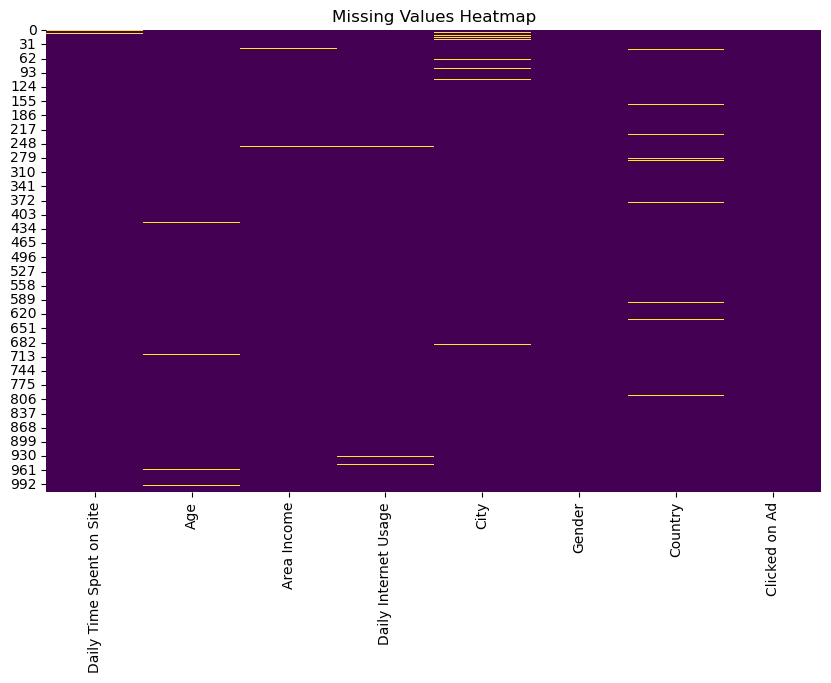

In [10]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.title('Missing Values Heatmap')
plt.show()

In [11]:
df.isnull().sum()

Daily Time Spent on Site     4
Age                         11
Area Income                 11
Daily Internet Usage         4
City                        11
Gender                       0
Country                     13
Clicked on Ad                0
dtype: int64

In [12]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

In [13]:
num_imputer = KNNImputer(n_neighbors=3)
df[num_cols] = num_imputer.fit_transform(df[num_cols])

cat_imputer = SimpleImputer(strategy='most_frequent')
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

In [14]:
df.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
City                        0
Gender                      0
Country                     0
Clicked on Ad               0
dtype: int64

In [15]:
cat_cols

['City', 'Gender', 'Country']

In [16]:
label_encoder = LabelEncoder()

for features in cat_cols:
    df[features] = label_encoder.fit_transform(df[features])

In [17]:
num_cols

['Daily Time Spent on Site',
 'Age',
 'Area Income',
 'Daily Internet Usage',
 'Clicked on Ad']

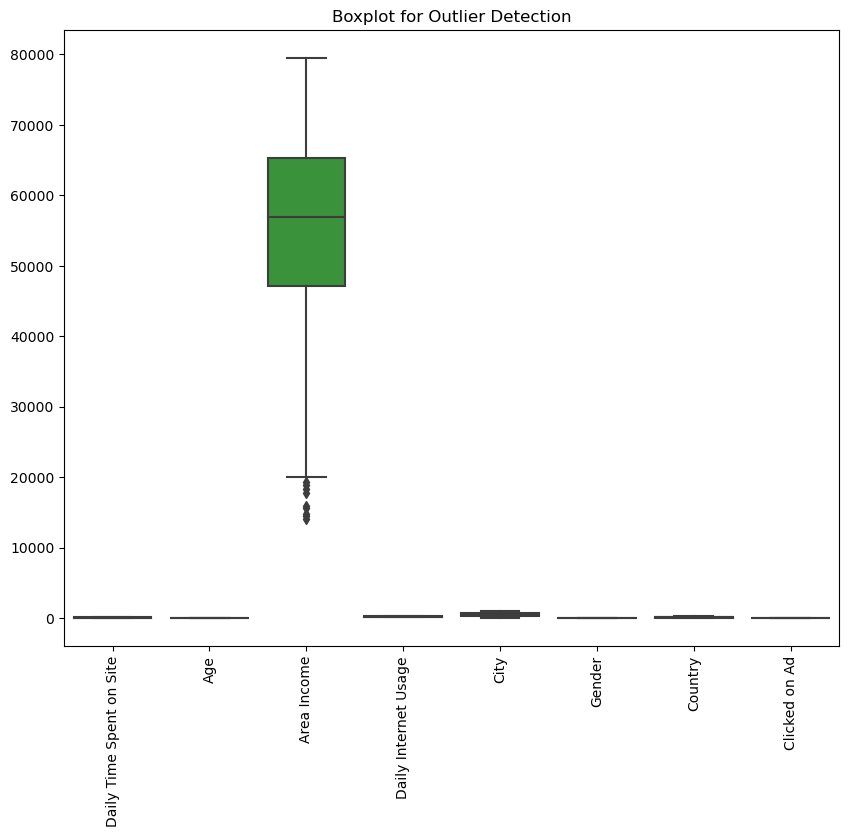

In [18]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title('Boxplot for Outlier Detection')
plt.show()

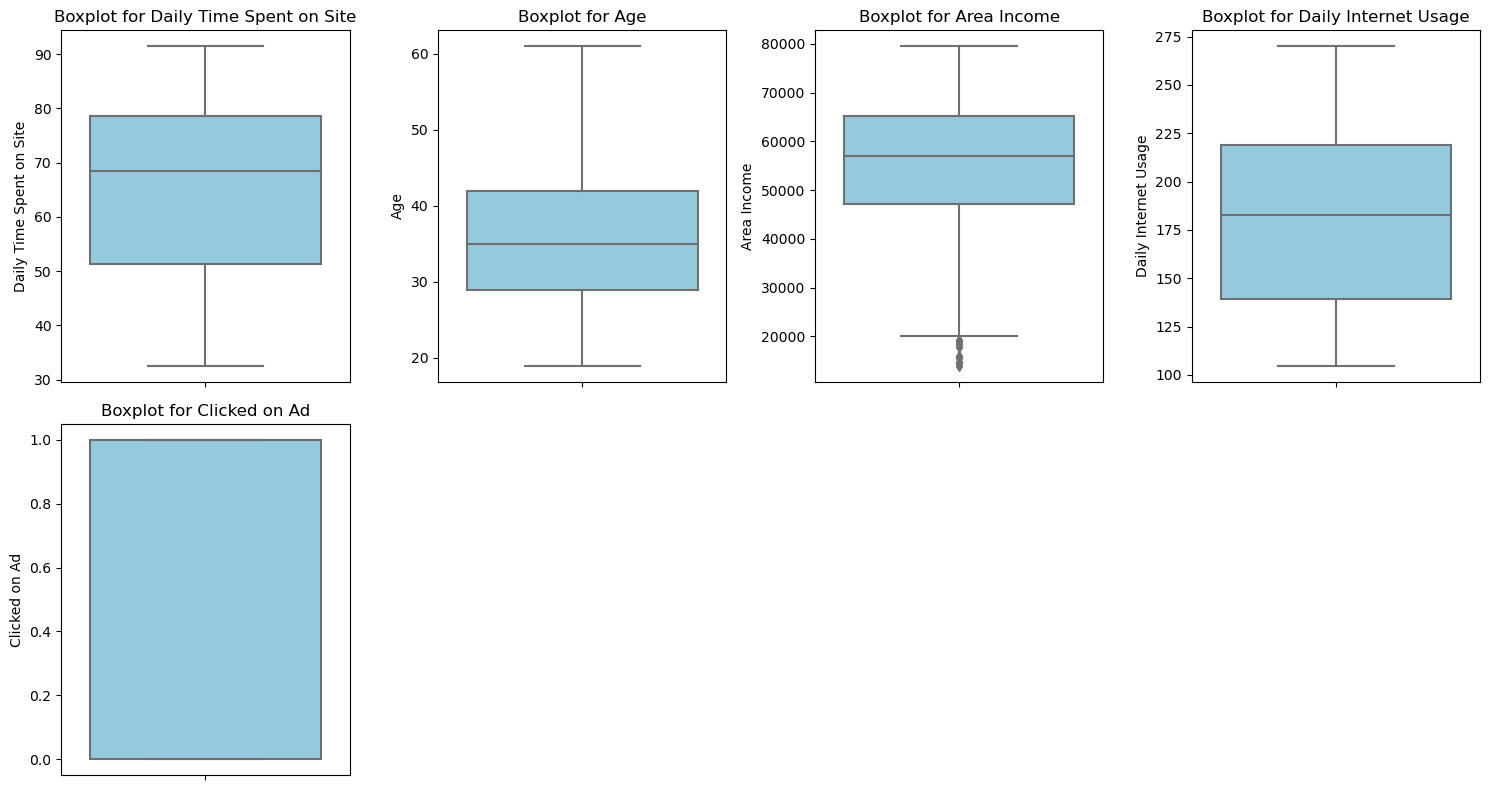

In [19]:
plt.figure(figsize=(15, 8))

for i, feature in enumerate(num_cols, 1):
    plt.subplot(2, 4, i)  
    sns.boxplot(y=df[feature], color='skyblue')  
    plt.title(f'Boxplot for {feature}') 

plt.tight_layout() 
plt.show()

In [20]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)  
    Q3 = df[column].quantile(0.75)  
    IQR = Q3 - Q1                   
    lower_bound = Q1 - 1.5 * IQR   
    upper_bound = Q3 + 1.5 * IQR    

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

outliers_columns= []

for col in num_cols:
    outliers = detect_outliers_iqr(df, col)
    if outliers.empty:
        print(f'Column {col} has no outliers')
    else:
        print(f"Column: {col}")
        print(f"Number of Outliers: {len(outliers)}")
        outliers_columns.append(col)
    print('\n')
    

Column Daily Time Spent on Site has no outliers


Column Age has no outliers


Column: Area Income
Number of Outliers: 9


Column Daily Internet Usage has no outliers


Column Clicked on Ad has no outliers




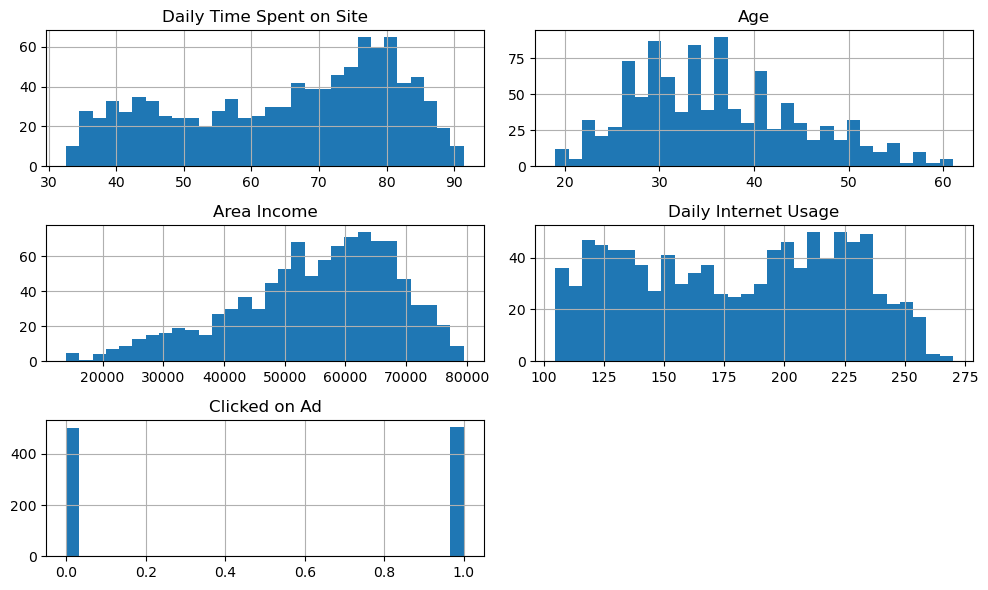

In [21]:
df[num_cols].hist(figsize=(10, 6), bins=30)
plt.tight_layout()  
plt.show()

In [22]:
scaler = MinMaxScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

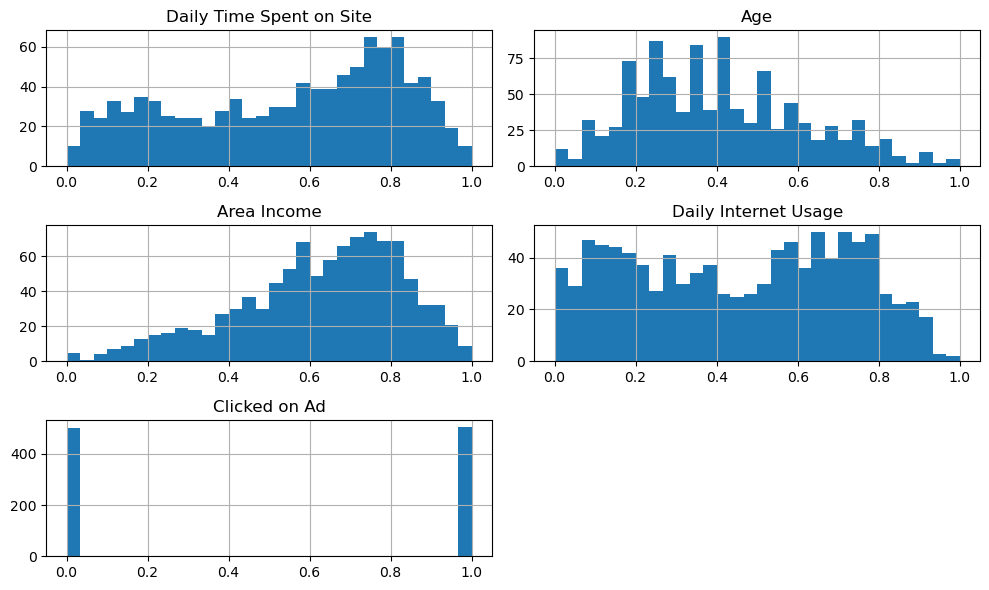

In [23]:
df[num_cols].hist(figsize=(10, 6), bins=30)
plt.tight_layout() 
plt.show()

In [24]:
X = df.drop('Clicked on Ad', axis=1)
y = df['Clicked on Ad']

In [25]:
num_cols.remove('Clicked on Ad')

In [26]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [27]:
gaussian_nb = GaussianNB()
gaussian_nb.fit(X_train[num_cols], y_train)

GaussianNB()

In [28]:
categorical_nb = MultinomialNB()
categorical_nb.fit(X_train[cat_cols], y_train)

MultinomialNB()

In [29]:
num_probs = gaussian_nb.predict_proba(X_test[num_cols])
cat_probs = categorical_nb.predict_proba(X_test[cat_cols])

In [30]:
final_probs = num_probs * cat_probs
final_preds = final_probs.argmax(axis=1)

In [31]:
accuracy = accuracy_score(y_test, final_preds)
print(f'Combined Model Accuracy: {accuracy:.2f}')

Combined Model Accuracy: 0.96


In [32]:
print("Confusion Matrix:\n", confusion_matrix(y_test, final_preds))

Confusion Matrix:
 [[102   3]
 [  6  91]]


In [33]:
print("Classification Report:\n", classification_report(y_test, final_preds))

Classification Report:
               precision    recall  f1-score   support

         0.0       0.94      0.97      0.96       105
         1.0       0.97      0.94      0.95        97

    accuracy                           0.96       202
   macro avg       0.96      0.95      0.96       202
weighted avg       0.96      0.96      0.96       202



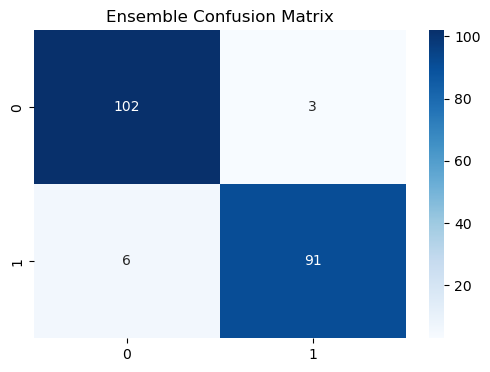

In [34]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, final_preds), annot=True, fmt='d', cmap='Blues')
plt.title("Ensemble Confusion Matrix")
plt.show()